# Problem Statement

Construct a Machine Learning model that can predict price of gold based on several other stock prices.

# Work Flow

* Importing Libraries
* Importing Dataset
* Data Preprocessing
* Data Analysis
* Train and Test Split
* Training the model (Random Forest Regressor)
* Model Evaluation
* Prediction System

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing Dataset

In [3]:
data = pd.read_csv('gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


**Data range is from date 1/2/2008 to 5/16/2018**

In [5]:
# Getting information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Checking null values in the dataset
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**There are no Null Values in the dataset**

In [8]:
# Getting statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = data.corr(numeric_only=True)

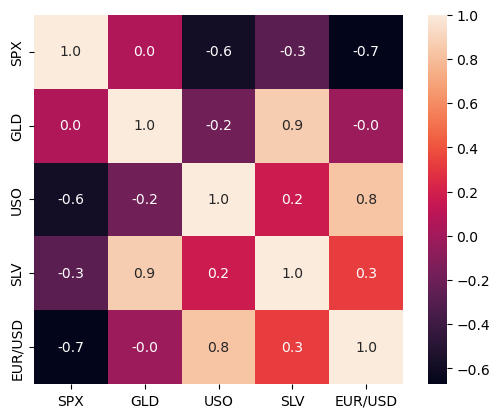

In [14]:
# Constructing a heatmap to understand correlation between columns
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True);

In [15]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


**Value of correlation of gold with column SLV is highly positively correlated**

<AxesSubplot:xlabel='GLD', ylabel='Count'>

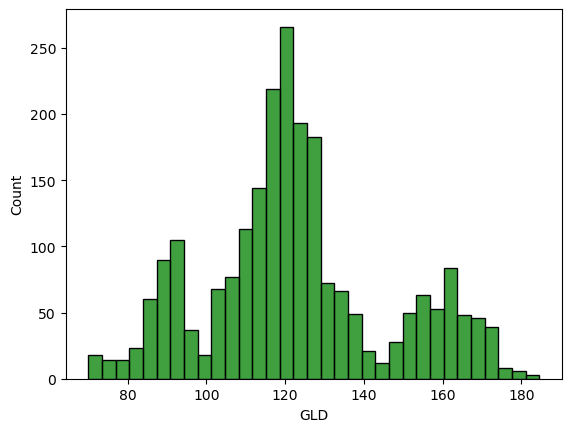

In [21]:
# Checking the distribution of the gold price
sns.histplot(data['GLD'], color='green')

# Splitting the Features and Target

In [22]:
X = data.drop(['Date', 'GLD'], axis=1)

In [23]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [24]:
Y = data['GLD']

In [25]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [28]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2290,) (1832,) (458,)


# Model Training

In [35]:
model = RandomForestRegressor(n_estimators=100)

In [36]:
model.fit(X_train, Y_train)

RandomForestRegressor()

# Evaluating the model

### Prediction on test data

In [39]:
test_data_prediction = model.predict(X_test)

### R Squared error 

In [41]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888224575495788


# Comparing the actual values and predicted values in a plot

In [43]:
Y_test = list(Y_test)

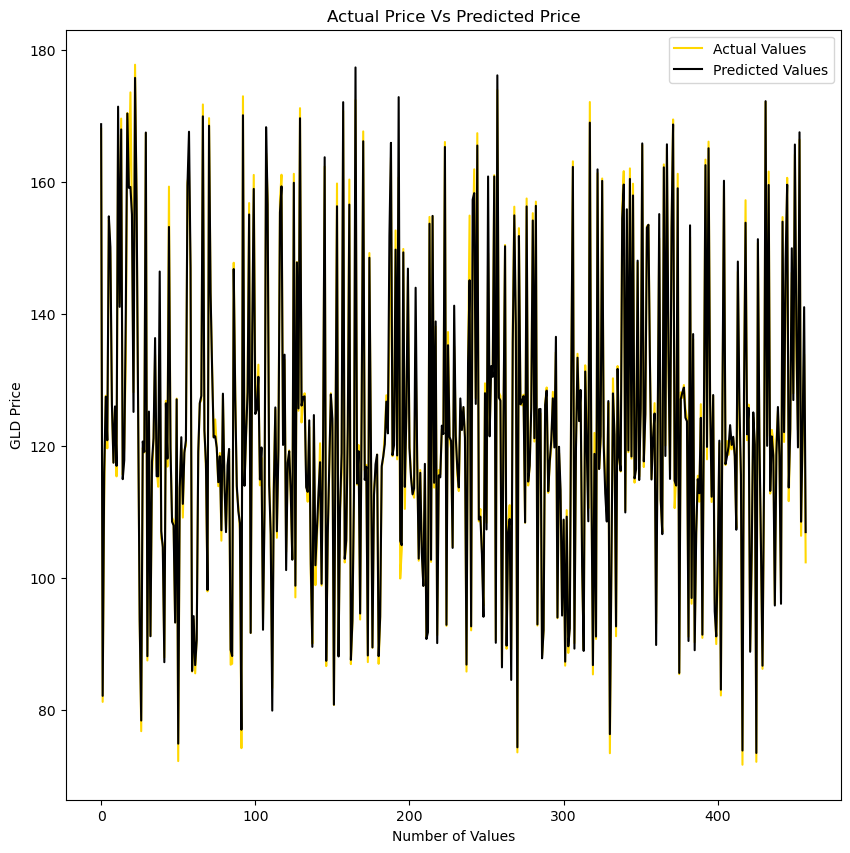

In [51]:
plt.figure(figsize=(10,10))
plt.plot(Y_test, color='gold', label='Actual Values')
plt.plot(test_data_prediction, color='black', label='Predicted Values')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel("Number of Values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()